In [3]:
from mtcnn import MTCNN
from mtcnn.utils.images import load_image

In [1]:
import cv2

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [12]:
# Create a detector instance
detector = MTCNN(device="cpu")

# Load an image
image = load_image("ex_image.png")

# Detect faces in the image
results = detector.detect_faces(image)

In [26]:
def get_bigger_face(results):
    bigger_face = None
    for face in results:
        # Get the bounding box coordinates
        x, y, width, height = face['box']
        
        # take the bigger one
        if bigger_face is None or (width * height) > (bigger_face['box'][2] * bigger_face['box'][3]):
            bigger_face = face

    return bigger_face

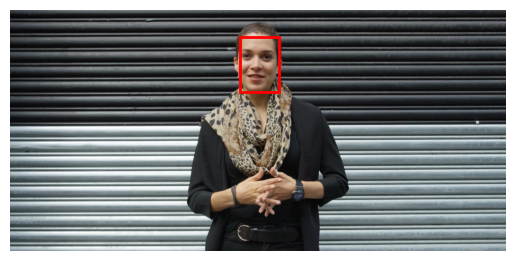

In [27]:
fig, ax = plt.subplots()

image_array = np.array(image)

ax.imshow(image_array)

x, y, width, height = get_bigger_face(results)['box']
rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.axis('off')
plt.show()

In [24]:
video_path = "../FF++/fake/01_02__outside_talking_still_laughing__YVGY8LOK.mp4"

In [ ]:
# Carica video
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Converti BGR -> RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Detect face
    results = detector.detect_faces(frame_rgb)

    # Get bigger face
    face = get_bigger_face(results)

    # Mostra frame con bounding box
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.imshow(frame_rgb)
    for result in results:
        x, y, w, h = result['box']
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.axis('off')
    plt.show()

    # Metti pausa tra i frame (simula animazione)
    plt.pause(0.05)

    # Chiudi la figura precedente per evitare memory leak
    plt.close(fig)

cap.release()